# Lasso Regression

Lasso Regression, short for Least Absolute Shrinkage and Selection Operator, is a type of linear regression that enhances the model by incorporating regularization. It is particularly effective in scenarios involving a large number of features.

## Key Concepts

### Regularization
Regularization is a technique used to prevent overfitting by adding a penalty to the loss function. In Lasso Regression, L1 regularization is used, which adds the absolute value of the coefficients as a penalty term to the loss function.

### Loss Function
The loss function for Lasso Regression is modified to include the L1 penalty:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2 + \lambda \sum_{j=1}^{n} |\theta_j|
$$

where:
- $$  \frac{1}{2m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2  $$ is the Mean Squared Error (MSE).
- $$ \lambda $$ is the regularization parameter.
- $$ \sum_{j=1}^{n} |\theta_j| $$ is the L1 penalty term.

### Feature Selection
One of the most notable properties of Lasso Regression is its ability to set some coefficients to zero. This effectively reduces the number of features included in the model, making it a useful tool for feature selection, especially in high-dimensional datasets.

### Hyperparameter lambda
The regularization parameter \( lambda \) controls the strength of the penalty. A higher \( lambda \) value increases the regularization effect, leading to more coefficients being shrunk to zero. The selection of \( lambda \) is crucial and is often done through cross-validation.

## Advantages

- **Feature Selection**: Lasso performs automatic feature selection by shrinking some coefficients to zero, which simplifies the model and makes it more interpretable.
- **Simplicity**: It produces simpler models with fewer features, making them easier to understand and work with.
- **Prevents Overfitting**: By penalizing large coefficients, Lasso reduces the risk of overfitting, especially in models with many predictors.

## Disadvantages

- **Biased Estimates**: The regularization can lead to biased coefficient estimates because it shrinks coefficients towards zero.
- **Sensitive to Scale**: Lasso is sensitive to the scale of the features, so feature scaling (standardization) is essential before applying it.

## Use Cases

Lasso Regression is particularly useful in the following scenarios:

- **Sparse Models**: When the true underlying model is expected to have only a few non-zero coefficients, Lasso can help identify and retain these significant features.
- **High-Dimensional Data**: In fields like genomics, text mining, and image processing, where the number of features can be very large, Lasso helps in selecting the most relevant features.
- **Model Interpretation**: In situations where model interpretability is important, Lasso's ability to simplify models by retaining only significant predictors makes it a valuable tool.
- **Preventing Overfitting**: In cases where overfitting is a concern, Lasso helps by adding a penalty for large coefficients, thus ensuring the model generalizes better to unseen data.

## Summary

Lasso Regression is a powerful linear regression technique that incorporates L1 regularization. It is effective for feature selection, simplifying models, and preventing overfitting. By adding a penalty proportional to the absolute value of the coefficients, Lasso encourages simpler models with fewer predictors, making it suitable for high-dimensional datasets where feature selection is crucial.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# On Linear Data

[28.32306211]
-1.6245450309369287


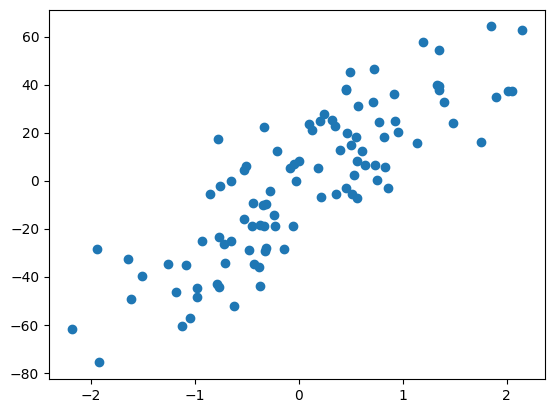

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.055e+04, tolerance: 7.745e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

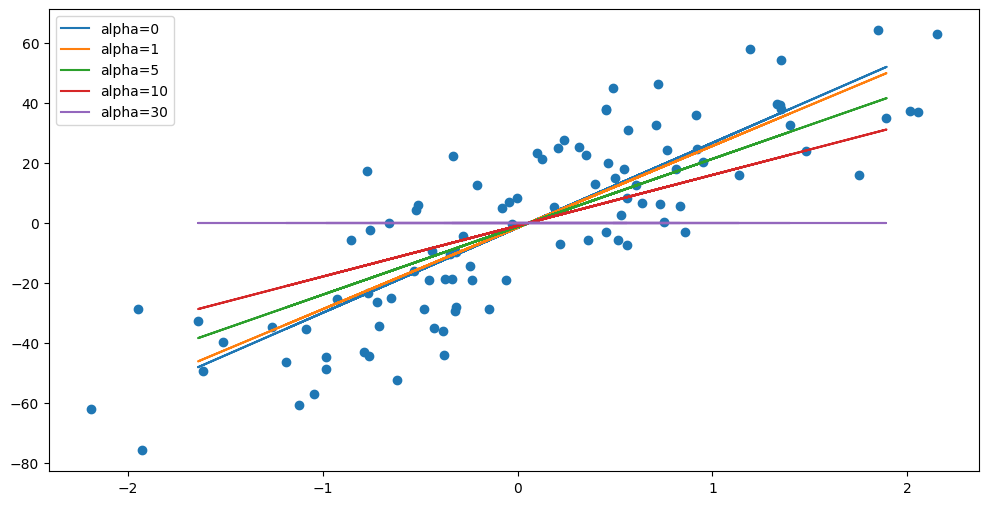

In [3]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

## On Polynomial Data

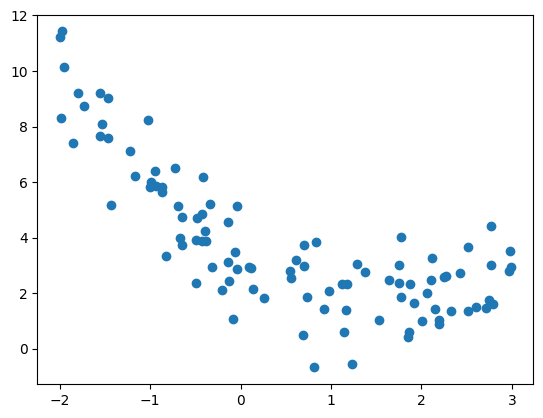

In [5]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.775e+01, tolerance: 6.622e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

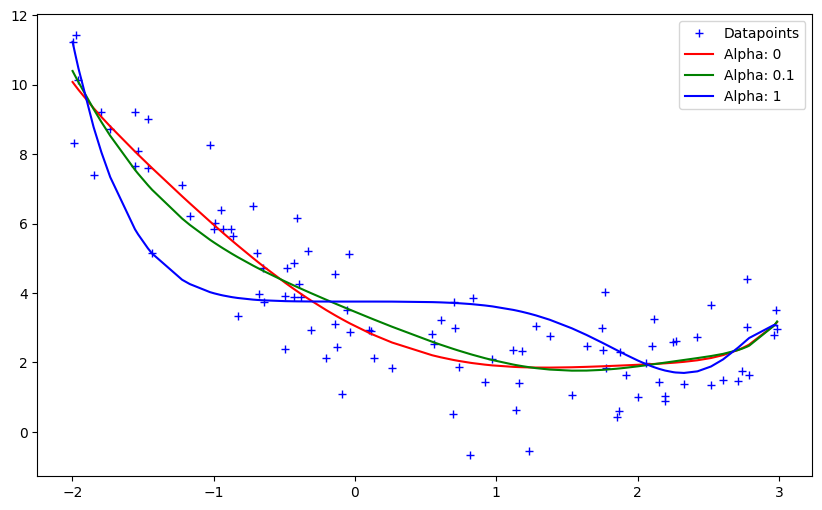

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()